- [Solution](https://github.com/DerwenAI/pytextrank)
- [Problem](https://github.com/DerwenAI/spaCy_tuTorial/blob/master/challenge.md)

# Programming Challenge

Starting with a text document...

  * parse the text document in `spaCy`
  * iterate through each sentence...
  * filter for `token.pos_ in ["ADJ", "NOUN", "PROPN", "VERB"]`
  * print the results

In [335]:
from collections import Counter
import math
from io import StringIO

import networkx as nx
from networkx.algorithms import approximation as apxa
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import pandas as pd
import spacy
from textacy import preprocessing
import pytextrank

%matplotlib inline

In [281]:
POS_KEPT = ["ADJ", "NOUN", "PROPN", "VERB"]

In [68]:
nlp = spacy.load("en_core_web_md")

In [442]:
text = """
roger martínez given second chance, may start against pumas.

 roger martínez has become a real headache for the entire club américa time as there has been a debate for well over a month now about what the club should do with the player.
martínez had been holding out for a european move but when did not come, he turned down a pair of mls deals (rumoured to be in the range of $15m) to inter miami and los angeles galaxy – much to the chagrin of the américa heirarchy.
while there are many who support the notion to keep the colombian attacker frozen out of the squad, other fans say he should be forgiven – especially because up to nine other players could miss out due to injury or suspension.
on wednesday, it appears there was a change of heart in the américa camp as various sources, including espn, fox sports, and other major sports media, say that roger’s punishment has been lifted.
if this is true, the fact is that he would very likely start in the match against pumas this friday.
in training on wednesday, manager miguel herrera rehearsed with martínez as part of the starting squad, so everything that he will lead the line in the clásico capitalino.
since joining américa from villarreal, the 25-year-old has scored 17 goals and contributed 11 assists in 67 matches.
"""

In [337]:
text = """
Chelsea 'opted against' signing Salomon Rondón on deadline day

 Chelsea reportedly opted against signing Salomón Rondón on deadline day despite their long search for a new centre forward.
With Olivier Giroud expected to leave, the Blues targeted Edinson Cavani, Dries Mertens and Moussa Dembele – only to end up with none of them.
According to Telegraph Sport, Dalian Yifang offered Rondón to Chelsea only for them to prefer keeping Giroud at the club.
Manchester United were also linked with the Venezuela international before agreeing a deal for Shanghai Shenhua striker Odion Ighalo.
Manager Frank Lampard made no secret of his transfer window frustration, hinting that to secure top four football he ‘needed’ signings.
Their draw against Leicester on Saturday means they have won just four of the last 13 Premier League matches.
"""

In [340]:
text = """
Barcelona confirm another injury for Ousmane Dembele

 Barcelona have confirmed that winger Ousmane Dembélé has suffered yet another injury.
Dembélé hasn’t played since November 27 due to a hamstring problem, with the club now confirming another setback in training.
“During this morning’s training session, Ousmane Dembélé felt some discomfort in his right leg as a consequence of muscle fatigue,” read an official statement.
“He will continue with his rehabilitation.”
The LaLiga club have given no official time frame on his potential return date.
"""

In [443]:
doc = nlp(preprocessing.remove_accents(text))

In [444]:
for sent in doc.sents:
    print([token for token in sent if token.pos_ in POS_KEPT])

[roger, martinez, given, second, chance, may, start, pumas]
[roger, martinez, become, real, headache, entire, club, america, time, debate, month, club, should, player]
[martinez, holding, european, move, come, turned, pair, mls, deals, rumoured, range, inter, miami, los, angeles, galaxy, chagrin, america, heirarchy]
[many, support, notion, keep, colombian, attacker, frozen, squad, other, fans, say, should, forgiven, other, players, could, miss, injury, suspension]
[wednesday, appears, change, heart, america, camp, various, sources, including, espn, fox, sports, other, major, sports, media, say, roger, punishment, lifted]
[true, fact, would, start, match, pumas, friday]
[training, wednesday, manager, miguel, herrera, rehearsed, martinez, part, starting, squad, will, lead, line, clasico, capitalino]
[joining, america, villarreal, 25-year, old, scored, goals, contributed, assists, matches]


Next, construct a graph...

  * create a graph in `networkx` 
  * use `key = (token.lemma_, token.pos_)`
  * create graph nodes using the key
  * link nodes in each sentence which are within 3 hops
  * visualize the graph

In [445]:
G = nx.Graph()

In [446]:
G.add_nodes_from([(token.lemma_, token.pos_) for token in doc if token.pos_ in POS_KEPT])

In [447]:
edges = []
for sent in doc.sents:
    H = [(token.lemma_, token.pos_) for token in sent if token.pos_ in POS_KEPT]
    for hop in range(3):
        for idx, node in enumerate(H[:-1-hop]):
            nbor = H[hop + idx + 1]
            edges.append((node, nbor))

# Include weight on the edge: (2, 3, {'weight': 3.1415})
edges = [(*n, dict(weight=w)) for n, w in Counter(edges).items()]  

In [448]:
G.add_edges_from(edges)

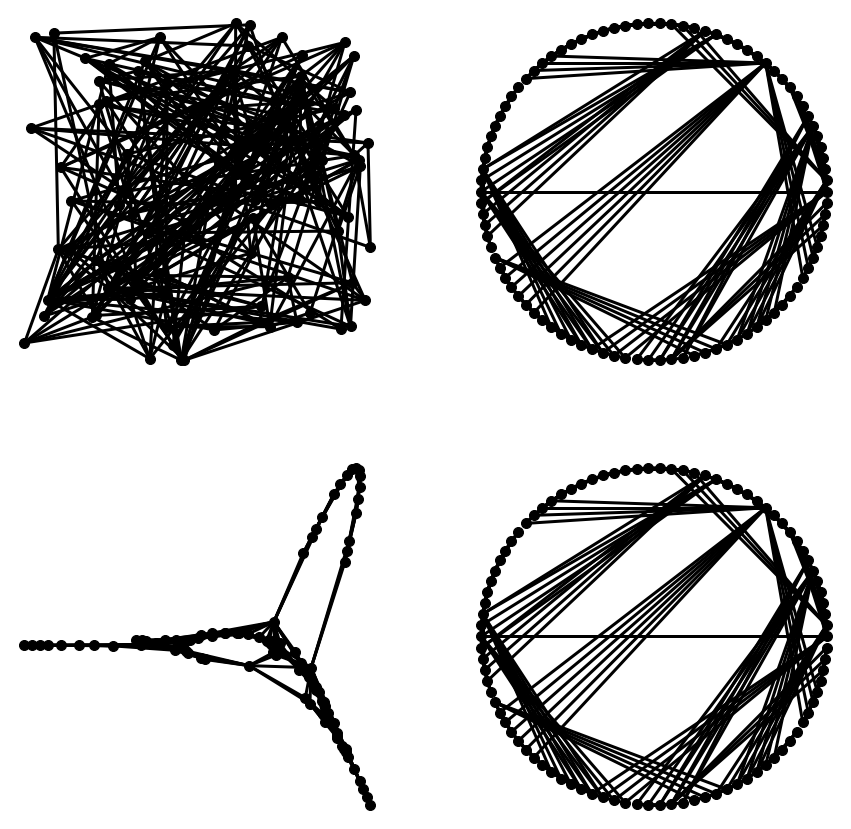

In [449]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
f, axs = plt.subplots(2,2,figsize=(15,15))
nx.draw_random(G, ax=axs[0][0], **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, **options)

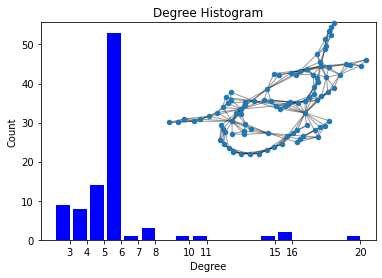

In [450]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.show()

{('roger', 'PROPN'): Text(-0.15638637609428824, 0.12349963107004217, 'roger'),
 ('martinez',
  'PROPN'): Text(-0.22185279275958872, -0.18711999602040255, 'martinez'),
 ('give', 'VERB'): Text(-0.32214037473916207, -0.00844689795852812, 'give'),
 ('second', 'ADJ'): Text(-0.30736032556199966, -0.04036731219894438, 'second'),
 ('chance', 'NOUN'): Text(-0.36080820470964575, -0.1017888161715014, 'chance'),
 ('may', 'VERB'): Text(-0.40144245439474624, -0.056678300623318384, 'may'),
 ('start', 'VERB'): Text(-0.27699552753285317, -0.1325501148163486, 'start'),
 ('pumas', 'PROPN'): Text(-0.2707687414991896, -0.0631672867241675, 'pumas'),
 ('become', 'VERB'): Text(-0.1386207825468455, -0.04417234877316498, 'become'),
 ('real', 'ADJ'): Text(-0.10550330312626766, -0.03150600355178513, 'real'),
 ('headache',
  'NOUN'): Text(-0.043971514803128525, -0.10183887427615265, 'headache'),
 ('entire', 'ADJ'): Text(0.010102771175341474, -0.03871190973811411, 'entire'),
 ('club', 'PROPN'): Text(0.0477386265644

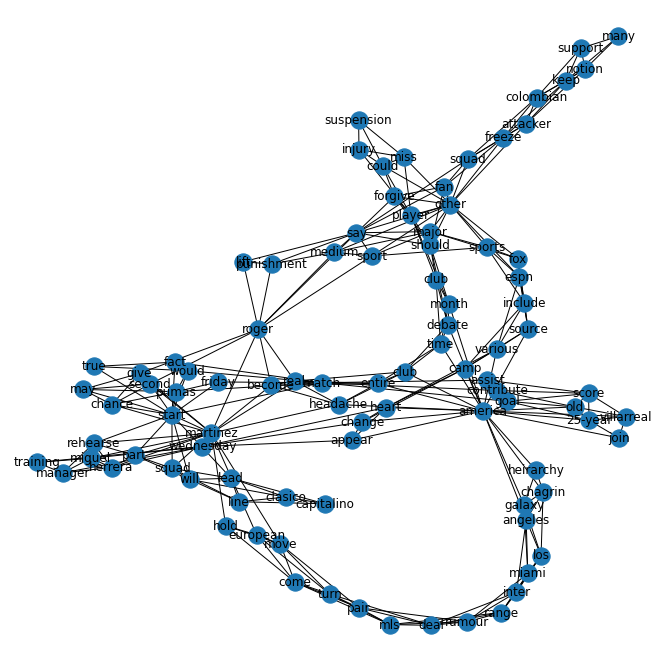

In [451]:
fig = plt.figure(figsize=(9, 9))
pos = nx.spring_layout(G)
labels = {k: k[0] for k, v in pos.items()}

nx.draw(G, pos=pos, with_labels=False, font_weight="bold")
nx.draw_networkx_labels(G, pos, labels)


Next, rank tokens based on their "connectedness" within the graph...

  * run `pagerank()` on the graph (eigenvalue centrality)
  * print the ranks (sort descending) and their lemma values



In [452]:
pr = nx.pagerank(G, alpha=0.9)

In [453]:
[k[0] for k, v in sorted(pr.items(), key=lambda x: x[1], reverse=True)][:10]

['america',
 'martinez',
 'start',
 'other',
 'roger',
 'say',
 'player',
 'should',
 'match',
 'wednesday']

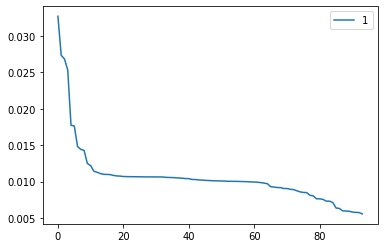

In [454]:
pd.DataFrame([(k[0],v) for k, v in sorted(pr.items(), key=lambda x: x[1], reverse=True)]).plot()

Next, apply the ranks to the noun chunks within the text...

  * iterate through each noun chunk in the text document
  * sum the ranks for each token (lemma) within the noun chunk
  * print the noun chunks (sort descending)


In [367]:
def discounted_normalised_rank(nc, sum_rank):
    non_lemma = len([tok for tok in nc if tok.pos_ not in POS_KEPT])
    
    # although the noun chunking is greedy, we discount the ranks using a
    # point estimate based on the number of non-lemma tokens within a phrase
    non_lemma_discount = len(nc) / (len(nc) + (2.0 * non_lemma) + 1.0)

    # use root mean square (RMS) to normalize the contributions of all the tokens
    phrase_rank = math.sqrt(sum_rank / (len(nc) + non_lemma))

    return phrase_rank * non_lemma_discount

In [368]:
phrases = {nc: sum(pr[(token.lemma_, token.pos_)] for token in nc if token.pos_ in POS_KEPT) for nc in doc.noun_chunks}

In [369]:
phrases = {nc: discounted_normalised_rank(nc, rank) for nc, rank in phrases.items()}

In [370]:
sorted(phrases.items(), key=lambda x: x[1], reverse=True)

[(roger martinez, 0.10010695476077372),
 (other major sports media, 0.0938640410004071),
 (america, 0.09043636242436728),
 (other fans, 0.08860944550708952),
 (martinez, 0.08269736510563239),
 (martinez, 0.08269736510563239),
 (manager miguel herrera, 0.07546273726682287),
 (mls deals, 0.06879664699436738),
 (various sources, 0.06726300291932275),
 (second chance, 0.06725455591501134),
 (fox sports, 0.06671759259011467),
 (the entire club america time, 0.06404278793798608),
 (inter miami and los angeles galaxy, 0.05809902440323658),
 (wednesday, 0.05587799826708329),
 (wednesday, 0.05587799826708329),
 (pumas, 0.05520096413143176),
 (pumas, 0.05520096413143176),
 (
  roger martinez,
  0.053089729916458536),
 (the america camp, 0.05184213412258523),
 (heart, 0.05114361054760121),
 (part, 0.05100903400851859),
 (espn, 0.050182847352445825),
 (the america heirarchy, 0.049041421714636275),
 (the starting squad, 0.048419063922800765),
 (villarreal, 0.04788908736351323),
 (injury, 0.04346177

In [371]:
ent_phrases = {ent: sum(pr[(token.lemma_, token.pos_)] for token in ent if token.pos_ in POS_KEPT) for ent in doc.ents}

In [372]:
ent_phrases = {ent: discounted_normalised_rank(ent, rank) for ent, rank in ent_phrases.items()}

In [373]:
sorted(ent_phrases.items(), key=lambda x: x[1], reverse=True)

[(roger martinez, 0.10010695476077372),
 (roger martinez, 0.10010695476077372),
 (america, 0.09043636242436728),
 (america, 0.09043636242436728),
 (america, 0.09043636242436728),
 (america, 0.09043636242436728),
 (martinez, 0.08269736510563239),
 (inter miami, 0.06874966085633766),
 (los angeles, 0.06867179369458319),
 (miguel herrera, 0.0686117686775384),
 (fox sports, 0.06671759259011467),
 (roger, 0.06659747363823784),
 (wednesday, 0.05587799826708329),
 (wednesday, 0.05587799826708329),
 (pumas, 0.05520096413143176),
 (pumas, 0.05520096413143176),
 (colombian, 0.05268556062508528),
 (mls, 0.05160758392883274),
 (second, 0.05031602119485584),
 (espn, 0.050182847352445825),
 (villarreal, 0.04788908736351323),
 (european, 0.047289126237509416),
 (this friday, 0.01750919152556755),
 (well over a month, 0.013752148756976782),
 ($15m, 0.0),
 (up to nine, 0.0),
 (17, 0.0),
 (11, 0.0),
 (67, 0.0)]

Extras:

  * use `spacy-wordnet` to add links among hypernyms and hyponyms
  * restrict the WordNet domains to specific areas of interest
  * how could you use noun chunks and entities within the graph?
  
for wordnet, see https://github.com/DerwenAI/spaCy_tuTorial/blob/master/spaCy_tuTorial.ipynb
wordnet does not support german (but does support everything else)

for using noun chunks and entities within the graph https://github.com/DerwenAI/pytextrank/blob/master/explain_algo.ipynb

In [230]:
list(nx.articulation_points(G))

[]

In [231]:
k_components = apxa.k_components(G, min_density=0.95)

In [246]:
max(k_components)

4

In [247]:
subg = G.subgraph([e for c in k_components[max(k_components)] for e in c])

{('Barcelona',
  'PROPN'): Text(-0.8558029495691278, -0.35665856493653925, 'Barcelona'),
 ('Dembele', 'PROPN'): Text(-0.820919025770279, 0.1818969528740435, 'Dembele'),
 ('November', 'PROPN'): Text(1.0, 0.2118141483210867, 'November'),
 ('winger', 'NOUN'): Text(-0.5464899923792047, 0.34262340487060694, 'winger'),
 ('suffer', 'VERB'): Text(-0.9953170274707863, 0.027186011648513364, 'suffer'),
 ('injury', 'NOUN'): Text(-0.5186724922920682, -0.38178132501110484, 'injury'),
 ('play', 'VERB'): Text(0.8202484560278378, 0.561765588150174, 'play'),
 ('Ousmane',
  'PROPN'): Text(-0.5227124014483157, -0.04071875732424356, 'Ousmane'),
 ('club', 'NOUN'): Text(0.8190377258818595, -0.4824464135495095, 'club'),
 ('problem',
  'NOUN'): Text(0.9706183543166926, -0.13349853113628785, 'problem'),
 ('confirm',
  'VERB'): Text(-0.002824821171661774, -0.19012688890768703, 'confirm'),
 ('Dembélé',
  'PROPN'): Text(0.035660053027419716, 0.21812304166893665, 'Dembélé'),
 ('hamstring',
  'NOUN'): Text(0.6171741

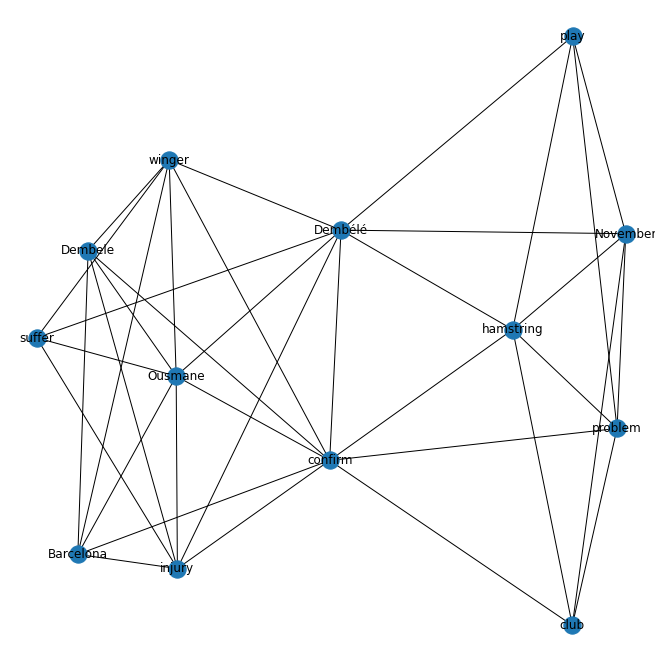

In [240]:
fig = plt.figure(figsize=(9, 9))
pos = nx.spring_layout(subg)
labels = {k: k[0] for k, v in pos.items()}

nx.draw(subg, pos=pos, with_labels=False, font_weight="bold")
nx.draw_networkx_labels(subg, pos, labels)

In [241]:
def greedy_degree_density(G):
	""" 
	Returns the subgraph with optimal degree density using 
	Charikar's greedy algorithm
    """
	neighbors=G.neighbors
	degrees=dict(G.degree())
	sum_degrees = sum(degrees.values())
	num_nodes = G.number_of_nodes()
	nodes=sorted(degrees,key=degrees.get)
	bin_boundaries=[0]
	curr_degree=0
	for i,v in enumerate(nodes):
		if degrees[v]>curr_degree:
			bin_boundaries.extend([i]*(degrees[v]-curr_degree))
			curr_degree=degrees[v]
	node_pos = dict((v,pos) for pos,v in enumerate(nodes))
	nbrs=dict((v,set(neighbors(v))) for v in G)
		
	max_degree_density = sum_degrees/float(num_nodes)
	ind = 0 
		
	for v in nodes:
		num_nodes -= 1
		while degrees[v] > 0:
			pos=node_pos[v]
			bin_start=bin_boundaries[degrees[v]]
			node_pos[v]=bin_start
			node_pos[nodes[bin_start]]=pos
			nodes[bin_start],nodes[pos]=nodes[pos],nodes[bin_start]
			bin_boundaries[degrees[v]]+=1
			degrees[v]-=1
		
		for u in nbrs[v]:
			
			nbrs[u].remove(v)
			pos=node_pos[u]
			bin_start=bin_boundaries[degrees[u]]
			node_pos[u]=bin_start
			node_pos[nodes[bin_start]]=pos
			nodes[bin_start],nodes[pos]=nodes[pos],nodes[bin_start]
			bin_boundaries[degrees[u]]+=1
			degrees[u]-=1
			sum_degrees -= 2
		
		
		if num_nodes > 0:
			current_degree_density = sum_degrees/float(num_nodes)
			if current_degree_density > max_degree_density:
				max_degree_density = current_degree_density
				ind = G.number_of_nodes()-num_nodes
				
	optimal_nodes = nodes[ind:]
		
	return G.subgraph(optimal_nodes)


In [242]:
subg = greedy_degree_density(G)

{('Barcelona',
  'PROPN'): Text(-0.3442880878449064, 0.66961836115969, 'Barcelona'),
 ('confirm',
  'VERB'): Text(-0.0007218286853291274, 0.42811794537714565, 'confirm'),
 ('injury', 'NOUN'): Text(-0.23055500006295188, 0.5365329181693959, 'injury'),
 ('Ousmane',
  'PROPN'): Text(-0.25386245870650415, 0.2568817242471347, 'Ousmane'),
 ('Dembele', 'PROPN'): Text(-0.450387622714773, 0.5507278938130349, 'Dembele'),
 ('winger', 'NOUN'): Text(-0.30192710876799694, 0.4354248414213106, 'winger'),
 ('Dembélé',
  'PROPN'): Text(0.003680637595131609, 0.13922621142497257, 'Dembélé'),
 ('suffer', 'VERB'): Text(-0.10790495851457332, 0.5729936040114154, 'suffer'),
 ('play', 'VERB'): Text(0.547203404088887, 0.29324630448519406, 'play'),
 ('November',
  'PROPN'): Text(0.47880209635933274, 0.14492463577933143, 'November'),
 ('hamstring',
  'NOUN'): Text(0.3284636316786757, 0.28216309779742477, 'hamstring'),
 ('problem', 'NOUN'): Text(0.43241172296819325, 0.4209014778339212, 'problem'),
 ('club', 'NOUN'):

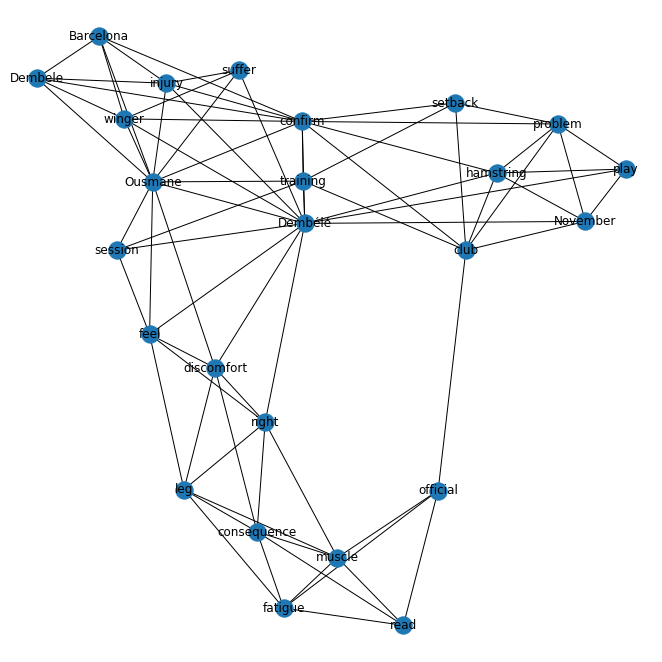

In [243]:
fig = plt.figure(figsize=(9, 9))
pos = nx.spring_layout(subg)
labels = {k: k[0] for k, v in pos.items()}

nx.draw(subg, pos=pos, with_labels=False, font_weight="bold")
nx.draw_networkx_labels(subg, pos, labels)

In [244]:
subg = G.subgraph(apxa.dominating_set.min_weighted_dominating_set(G))

{('Barcelona',
  'PROPN'): Text(-0.1204547428710376, 0.2962543756269734, 'Barcelona'),
 ('confirm',
  'VERB'): Text(-0.07265434835169647, 0.15996811178148918, 'confirm'),
 ('injury', 'NOUN'): Text(-0.18037167991951458, 0.24273509458692416, 'injury'),
 ('Ousmane',
  'PROPN'): Text(-0.12379864223297318, 0.16351032233515633, 'Ousmane'),
 ('winger', 'NOUN'): Text(-0.082910301793099, 0.2499246367675659, 'winger'),
 ('Dembélé',
  'PROPN'): Text(-0.1630780806286876, 0.1306525538183137, 'Dembélé'),
 ('play', 'VERB'): Text(-0.27834419061713506, 0.09058845786172792, 'play'),
 ('problem',
  'NOUN'): Text(-0.1359517512621616, 0.04924306199306634, 'problem'),
 ('club', 'NOUN'): Text(0.01714957713138347, -0.010100536744897142, 'club'),
 ('training',
  'NOUN'): Text(-0.03049016522771711, 0.10434517019325534, 'training'),
 ('feel', 'VERB'): Text(-0.1423029769859804, -0.03755326560159649, 'feel'),
 ('leg', 'NOUN'): Text(-0.08629830123850374, -0.25506118031308594, 'leg'),
 ('consequence',
  'NOUN'): Tex

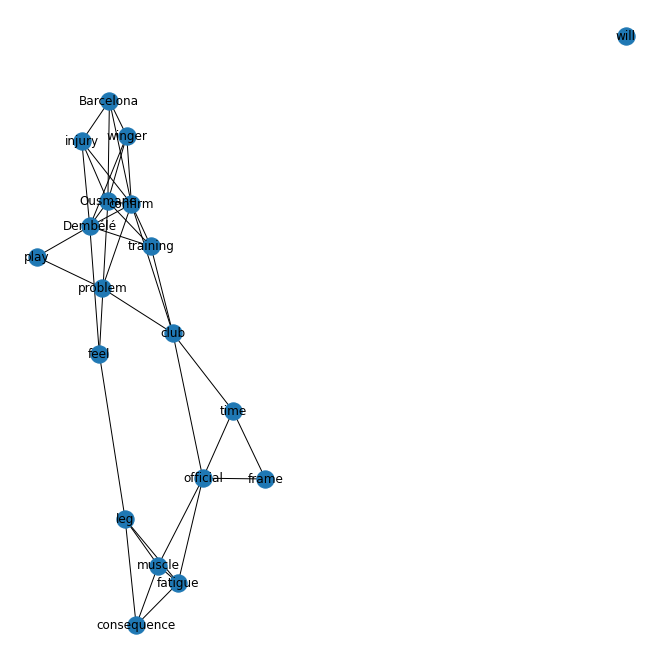

In [245]:
fig = plt.figure(figsize=(9, 9))
pos = nx.spring_layout(subg)
labels = {k: k[0] for k, v in pos.items()}

nx.draw(subg, pos=pos, with_labels=False, font_weight="bold")
nx.draw_networkx_labels(subg, pos, labels)

In [ ]:
tr = pytextrank.TextRank()
nlp.add_pipe(tr.PipelineComponent, name="textrank", last=True)

doc = nlp(text)

In [329]:
# examine the top-ranked phrases in the document
for p in doc._.phrases:
    print("{:.4f} {:5d}  {}".format(p.rank, p.count, p.text))
    print(p.chunks)

0.0939     4  roger martínez
[roger martínez, roger martínez, roger martínez, 
roger martínez]
0.0889     1  other major sports media
[other major sports media]
0.0865     3  américa
[américa, américa, américa]
0.0845     1  other fans
[other fans]
0.0782     3  martínez
[martínez, martínez, martínez]
0.0774     1  manager miguel herrera
[manager miguel herrera]
0.0724     1  second chance
[second chance]
0.0712     1  los angeles
[los angeles]
0.0702     1  mls deals
[mls deals]
0.0680     1  various sources
[various sources]
0.0680     1  miguel herrera
[miguel herrera]
0.0664     1  the entire club américa time
[the entire club américa time]
0.0659     1  roger
[roger]
0.0612     1  inter miami
[inter miami]
0.0589     2  fox sports
[fox sports, fox sports]
0.0587     4  wednesday
[wednesday, wednesday, wednesday, wednesday]
0.0582     1  inter miami and los angeles galaxy
[inter miami and los angeles galaxy]
0.0566     4  pumas
[pumas, pumas, pumas, pumas]
0.0553     1  second
[sec

# Building bipartite graphs

In [437]:
B = nx.Graph()
B.add_nodes_from(doc.ents, bipartite=0)
B.add_nodes_from(doc.noun_chunks, bipartite=1)
B.add_edges_from([(ent, nc, dict(weight=ent.similarity(nc))) for ent in doc.ents for nc in doc.noun_chunks])
pr = nx.pagerank(B, alpha=0.9)

In [438]:
[k[0] for k, v in sorted(pr.items(), key=lambda x: x[1], reverse=True)][:10]

[well, up, this, second, fox, america, america, america, america, inter]

In [439]:
B = nx.Graph()
B.add_nodes_from(doc.ents, bipartite=0)
B.add_nodes_from(doc.noun_chunks, bipartite=1)
B.add_edges_from([(ent, nc) for ent in doc.ents for nc in doc.noun_chunks if ent.text in nc.text])
pr = nx.pagerank(B, alpha=0.9)

In [440]:
[k[0] for k, v in sorted(pr.items(), key=lambda x: x[1], reverse=True)][:10]

[martinez, , roger, inter, roger, pumas, america, america, wednesday, america]

In [588]:
import boto3
from io import BytesIO

In [650]:
B = nx.Graph()
B.add_nodes_from([token.lemma_ for token in doc if token.pos_ in POS_KEPT], bipartite=0)
edges = []
for sent in doc.sents:
    H = [(token.lemma_, token.pos_) for token in sent if token.pos_ in POS_KEPT]
    for hop in range(3):
        for idx, node in enumerate(H[:-1-hop]):
            nbor = H[hop + idx + 1]
            edges.append((node, nbor))

# Include weight on the edge: (2, 3, {'weight': 3.1415})
edges = [(*n, dict(weight=w)) for n, w in Counter(edges).items()]  
B.add_edges_from(edges)

In [590]:
s3 = boto3.client('s3')
bucket_name = "of-article-entities"
key = 'prod2/mention_commonness.pkl.bz2'
obj = s3.get_object(Bucket=bucket_name, Key=key)
file_like = BytesIO(obj['Body'].read())
CMN = pd.read_pickle(file_like, compression='bz2')

In [651]:
df = CMN.loc["en", :].reindex([token.lemma_ for token in doc if token.pos_ in POS_KEPT]).dropna().unstack().drop_duplicates().rename("commonness")
df = df.loc[df > 0].reset_index()

In [655]:
df["entities"] = "__" + df.level_0 + "_" + df.level_1.astype(str) + "_" + df.entity_name
df["commonness"] = df.commonness.apply(lambda x: dict(weight=x))

In [653]:
B.add_nodes_from(df.entities.unique(), bipartite=1)

In [662]:
B.add_edges_from(list(df[["level_3", "entities", "commonness"]].itertuples(index=False, name=None)))

In [664]:
pr = nx.pagerank(B, alpha=0.9)

In [668]:
pr_only_entities = {k: v for k, v in pr.items() if k in df.entities.unique()}

/Users/louis.guitton/workspace/papers/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


In [670]:
[(k,v) for k, v in sorted(pr_only_entities.items(), key=lambda x: x[1], reverse=True)][:10]

[('__competition_10_LaLiga', 0.023175454278025427),
 ('__team_5_FC Barcelona', 0.017833345922033374),
 ('__competition_9_Premier League', 0.016930216999029933),
 ('__team_1834_CF America', 0.013586040330148269),
 ('__competition_13_Serie A', 0.012323665579350836),
 ('__competition_15_Major League Soccer', 0.011789258273603205),
 ('__team_26_Real Madrid', 0.011284458035198475),
 ('__team_1417_Chivas', 0.010562351221967229),
 ('__team_21_Manchester United', 0.007956802364554606),
 ('__competition_1_Bundesliga', 0.007825360254877421)]

# Building a text graph using the syntactic tree

In [582]:
# Load spacy's dependency tree into a networkx graph
edges = []
for token in doc:
    if token.pos_ in POS_KEPT:
        for child in token.children:
            if child.pos_ in POS_KEPT:
                edges.append((
                    (token.lemma_, token.pos_),
                    (child.lemma_, child.pos_)
                ))
G = nx.Graph(edges)

In [583]:
pr = nx.pagerank(G, alpha=0.9)

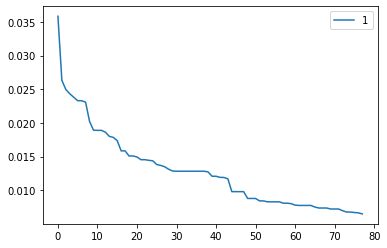

In [584]:
pd.DataFrame([(k[0],v) for k, v in sorted(pr.items(), key=lambda x: x[1], reverse=True)]).plot()

{('martinez',
  'PROPN'): Text(-0.058235028005094426, -0.05355836162390372, 'martinez'),
 ('roger', 'PROPN'): Text(-0.1576970463983841, -0.05681460299560688, 'roger'),
 ('give', 'VERB'): Text(0.009770970683924964, -0.1896029648078813, 'give'),
 ('chance', 'NOUN'): Text(0.08475252153923396, -0.2323740869156634, 'chance'),
 ('second', 'ADJ'): Text(0.14288317693742814, -0.26436768772440167, 'second'),
 ('start', 'VERB'): Text(0.033993614058807874, -0.31348067690085984, 'start'),
 ('may', 'VERB'): Text(0.014183993647239256, -0.38045124158930904, 'may'),
 ('become', 'VERB'): Text(-0.15085542685952505, 0.00635731704917268, 'become'),
 ('headache',
  'NOUN'): Text(-0.23715045610501678, 0.04962105413759058, 'headache'),
 ('real', 'ADJ'): Text(-0.3041795954401655, 0.07806313171137871, 'real'),
 ('america',
  'PROPN'): Text(-0.3246181381669973, 0.7294380686929882, 'america'),
 ('club', 'PROPN'): Text(-0.38580846568728383, 0.7668613948177468, 'club'),
 ('time', 'NOUN'): Text(-0.2611340919352851, 

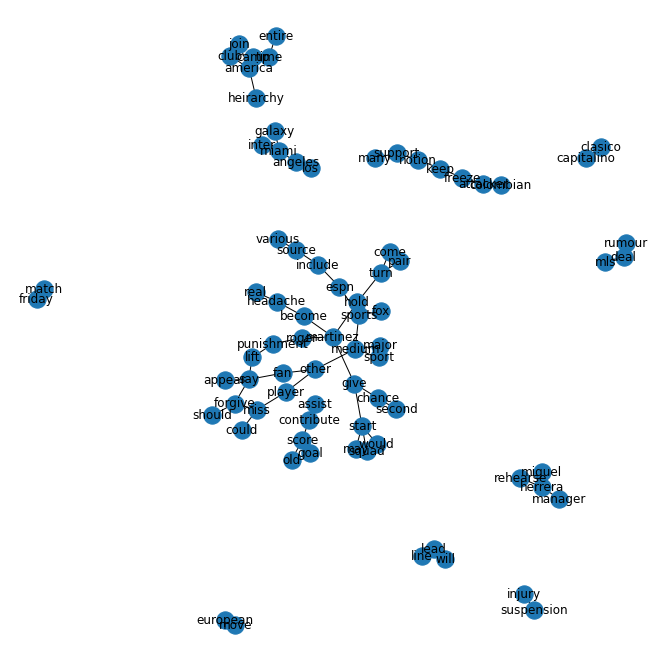

In [585]:
fig = plt.figure(figsize=(9, 9))
pos = nx.spring_layout(G)
labels = {k: k[0] for k, v in pos.items()}

nx.draw(G, pos=pos, with_labels=False, font_weight="bold")
nx.draw_networkx_labels(G, pos, labels)

# Bonus: We try 1 other implementation of textrank and 3 other algorithms

In [501]:
from textacy.ke import textrank, yake, sgrank, scake

In [510]:
# Textrank
textrank(doc, window_size=3, edge_weighting="binary", position_bias=False, include_pos=POS_KEPT)

[('roger martinez give second chance', 0.03550535494751496),
 ('entire club america time', 0.028814902669056848),
 ('manager miguel herrera rehearse', 0.0192247119742573),
 ('join america', 0.01753709880780603),
 ('america camp', 0.01749347784152227),
 ('america heirarchy', 0.017221423387588523),
 ('start squad', 0.015567216827713122),
 ('los angeles galaxy', 0.015260156517655835),
 ('major sport medium', 0.01407352590854669),
 ('colombian attacker freeze', 0.01391137423749082)]

In [511]:
# SingleRank: window_size=10, edge_weighting="count", position_bias=False
textrank(doc, window_size=10, edge_weighting="count", position_bias=False, include_pos=POS_KEPT)

[('entire club america time', 0.02986355145310707),
 ('roger martinez give second chance', 0.02842172657028433),
 ('join america', 0.018443096849406516),
 ('america camp', 0.018345757102179172),
 ('america heirarchy', 0.01823992058113279),
 ('start squad', 0.017999178374572863),
 ('manager miguel herrera rehearse', 0.01702356858669186),
 ('los angeles galaxy', 0.013611924236645883),
 ('major sport medium', 0.01300107025805159),
 ('colombian attacker freeze', 0.012746722121897909)]

In [512]:
# PositionRank: window_size=10, edge_weighting="count", position_bias=True
textrank(doc, window_size=3, edge_weighting="binary", position_bias=True, include_pos=POS_KEPT)

[('roger martinez give second chance', 0.10587539631242805),
 ('entire club america time', 0.030457280780322605),
 ('america heirarchy', 0.018829062852625797),
 ('join america', 0.018657720471692788),
 ('start squad', 0.01770466315473869),
 ('america camp', 0.0172474010986211),
 ('manager miguel herrera rehearse', 0.014680741946875114),
 ('pumas', 0.010980166943135822),
 ('real headache', 0.01078435396024551),
 ('clasico capitalino', 0.008510059316954794)]

In [513]:
yake(doc, window_size=3, include_pos=POS_KEPT)

[('martinez', 0.3420844199256822),
 ('america', 0.3572459870017999),
 ('roger', 0.3757658922815985),
 ('start', 0.4250815747018345),
 ('pumas', 0.5035057208648955),
 ('player', 0.5135347045768908),
 ('club', 0.5195313058021604),
 ('wednesday', 0.5214633494935211),
 ('squad', 0.5243997501761639),
 ('match', 0.5331530088205324)]

In [514]:
scake(doc, include_pos=POS_KEPT)

[('roger martinez give second chance', 10368.625572982228),
 ('entire club america time', 1510.1060097321588),
 ('america camp', 804.0509054161851),
 ('start squad', 801.3641862185209),
 ('america heirarchy', 797.6112780869925),
 ('join america', 789.3928311499778),
 ('real headache', 358.38947368421054),
 ('pumas', 252.81553398058253),
 ('player', 223.99749687108883),
 ('debate', 109.125)]

In [517]:
sgrank(doc, window_size=10, include_pos=POS_KEPT)

[('roger martinez', 0.11134552550149238),
 ('second chance', 0.09992633804242766),
 ('give second', 0.061802034291965735),
 ('martinez give', 0.04878458537442987),
 ('pumas', 0.032328610551760166),
 ('match', 0.02985067634811448),
 ('america time', 0.028724305723148495),
 ('sport medium', 0.02778940165361723),
 ('mls deal', 0.021118890168860316),
 ('start', 0.01847658834517182)]

In [ ]:
# https://chartbeat-labs.github.io/textacy/build/html/api_reference/information_extraction.html#yake